<a href="https://colab.research.google.com/github/mlacasa/Algebra-I/blob/main/EspaciosVectoriales(II).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Conceptos Avanzados de Espacios Vectoriales
##Matriz de Cambio de Base
Una matriz de cambio de base es una herramienta fundamental que nos permite transformar las coordenadas de un vector expresado en una base a coordenadas expresadas en otra base.
##Definición formal
Sean $B = {v_1, v_2, \ldots, v_n}$ y $B' = {w_1, w_2, \ldots, w_n}$ dos bases de un espacio vectorial $V$ de dimensión $n$. La matriz de cambio de base de $B$ a $B'$, denotada como $P_{B \rightarrow B'}$, es aquella que satisface:


$$
[v]_{B'} = P_{B \rightarrow B'} \cdot [v]_{B}
$$


donde $[v]B$ representa las coordenadas del vector $v$ respecto a la base $B$, y $[v]{B'}$ representa las coordenadas del mismo vector respecto a la base $B'$.
##Construcción de la matriz de cambio de base
Para construir la matriz $P_{B \rightarrow B'}$, debemos:

Expresar cada vector de la base $B$ en términos de la base $B'$.
Colocar las coordenadas obtenidas como columnas de la matriz.

Formalmente, si:

$$
v_j = \sum_{i=1}^{n} p_{ij} w_i
$$

Entonces $ P_{B \rightarrow B'} = p_{ij} $, donde $p_{ij} $ es la componente $ i $-ésima del vector $ v_j $ expresado en la base $ B' $.


Matriz de cambio de base de la base canónica a la base alternativa:
[[1. 0. 1.]
 [1. 1. 0.]
 [0. 1. 1.]]

Verificación:
Vector v en base canónica: [3 2 1]
Vector v en base alternativa usando la matriz de cambio: [5. 3. 4.]
Vector v en base alternativa (calculado manualmente): [2. 0. 1.]
¿Los resultados coinciden? False


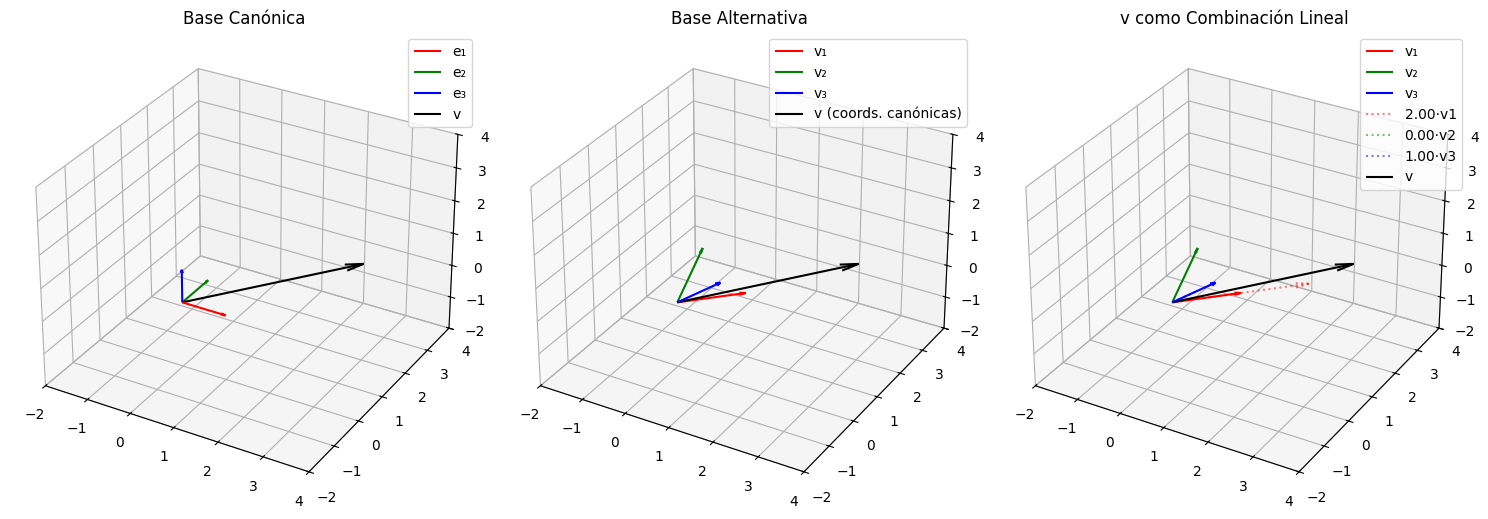

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_basis(ax, basis, origin=np.zeros(3), colors=['r', 'g', 'b'], labels=['v₁', 'v₂', 'v₃'], linestyles='-'):
    """
    Dibuja una base en un espacio 3D.

    Args:
        ax: Objeto de ejes 3D de matplotlib
        basis: Lista de 3 vectores que forman la base
        origin: Origen desde donde se dibujan los vectores
        colors: Colores para cada vector
        labels: Etiquetas para cada vector
        linestyles: Estilo de línea para los vectores
    """
    for i, v in enumerate(basis):
        # Dibujar vector desde el origen
        ax.quiver(origin[0], origin[1], origin[2],
                  v[0], v[1], v[2],
                  color=colors[i], label=labels[i],
                  arrow_length_ratio=0.1, linestyle=linestyles)

def change_of_basis_matrix(basis_B, basis_B_prime):
    """
    Calcula la matriz de cambio de base de B a B'.

    Args:
        basis_B: Lista de vectores que forman la base B
        basis_B_prime: Lista de vectores que forman la base B'

    Returns:
        La matriz de cambio de base P_{B->B'}
    """
    # Convertir las bases a matrices donde las columnas son los vectores
    B = np.column_stack(basis_B)
    B_prime = np.column_stack(basis_B_prime)

    # Calcular la matriz de cambio de base
    # Para expresar los vectores de B en términos de B', tenemos:
    # B = B' * P_{B'->B}
    # Por lo tanto:
    # P_{B'->B} = (B')^(-1) * B
    # Y la matriz que queremos es la inversa:
    # P_{B->B'} = P_{B'->B}^(-1) = B^(-1) * B'

    P = np.linalg.inv(B) @ B_prime
    return P

def demonstrate_change_of_basis():
    # Definir la base canónica de R³
    canonical_basis = [
        np.array([1, 0, 0]),
        np.array([0, 1, 0]),
        np.array([0, 0, 1])
    ]

    # Definir una base alternativa
    alternative_basis = [
        np.array([1, 1, 0]),     # v₁ = (1,1,0)
        np.array([0, 1, 1]),     # v₂ = (0,1,1)
        np.array([1, 0, 1])      # v₃ = (1,0,1)
    ]

    # Calcular la matriz de cambio de base
    P = change_of_basis_matrix(canonical_basis, alternative_basis)

    print("Matriz de cambio de base de la base canónica a la base alternativa:")
    print(P)
    print("\nVerificación:")

    # Definir un vector en coordenadas de la base canónica
    v_canonical = np.array([3, 2, 1])
    print(f"Vector v en base canónica: {v_canonical}")

    # Calcular las coordenadas en la base alternativa usando la matriz de cambio
    v_alternative = P.T @ v_canonical
    print(f"Vector v en base alternativa usando la matriz de cambio: {v_alternative}")

    # Verificar manualmente el resultado
    # Para ello, resolvemos el sistema de ecuaciones:
    # v = a·v₁ + b·v₂ + c·v₃
    # donde v es el vector en coordenadas canónicas, y v₁, v₂, v₃ son los vectores de la base alternativa

    # Formar la matriz de los vectores de la base alternativa
    A = np.column_stack(alternative_basis)

    # Resolver el sistema A [a,b,c]ᵀ = v
    v_alt_manual = np.linalg.solve(A, v_canonical)
    print(f"Vector v en base alternativa (calculado manualmente): {v_alt_manual}")

    # Verificar si ambos resultados coinciden
    print(f"¿Los resultados coinciden? {np.allclose(v_alternative, v_alt_manual)}")

    # Visualizar las bases y el vector
    fig = plt.figure(figsize=(15, 5))

    # Gráfico 1: Base canónica
    ax1 = fig.add_subplot(131, projection='3d')
    plot_basis(ax1, canonical_basis, labels=['e₁', 'e₂', 'e₃'])

    # Dibujar el vector en coordenadas canónicas
    ax1.quiver(0, 0, 0, v_canonical[0], v_canonical[1], v_canonical[2],
               color='black', arrow_length_ratio=0.1, label='v')

    ax1.set_xlim([-2, 4])
    ax1.set_ylim([-2, 4])
    ax1.set_zlim([-2, 4])
    ax1.set_title('Base Canónica')
    ax1.legend()

    # Gráfico 2: Base alternativa
    ax2 = fig.add_subplot(132, projection='3d')
    plot_basis(ax2, alternative_basis)

    # Dibujar el vector en coordenadas canónicas
    ax2.quiver(0, 0, 0, v_canonical[0], v_canonical[1], v_canonical[2],
               color='black', arrow_length_ratio=0.1, label='v (coords. canónicas)')

    ax2.set_xlim([-2, 4])
    ax2.set_ylim([-2, 4])
    ax2.set_zlim([-2, 4])
    ax2.set_title('Base Alternativa')
    ax2.legend()

    # Gráfico 3: Vector expresado como combinación lineal de la base alternativa
    ax3 = fig.add_subplot(133, projection='3d')
    plot_basis(ax3, alternative_basis)

    # Dibujar las componentes del vector en la base alternativa
    for i in range(3):
        component = v_alt_manual[i] * np.array(alternative_basis[i])
        ax3.quiver(0, 0, 0, component[0], component[1], component[2],
                   color=['r', 'g', 'b'][i], alpha=0.5, arrow_length_ratio=0.1,
                   linestyle=':', label=f'{v_alt_manual[i]:.2f}·v{i+1}')

    # Dibujar el vector original
    ax3.quiver(0, 0, 0, v_canonical[0], v_canonical[1], v_canonical[2],
               color='black', arrow_length_ratio=0.1, label='v')

    ax3.set_xlim([-2, 4])
    ax3.set_ylim([-2, 4])
    ax3.set_zlim([-2, 4])
    ax3.set_title('v como Combinación Lineal')
    ax3.legend()

    plt.tight_layout()
    plt.show()

    return P, v_canonical, v_alternative

# Ejecutar la demostración
P, v_canonical, v_alternative = demonstrate_change_of_basis()

#Propiedades importantes

Si tenemos las matrices de cambio $P_{A \rightarrow B}$ y $P_{B \rightarrow C}$, entonces $P_{A \rightarrow C} = P_{B \rightarrow C} \cdot P_{A \rightarrow B}$
$P_{B \rightarrow A} = P_{A \rightarrow B}^{-1}$
Para transformaciones lineales, si $[T]_A$ es la matriz de la transformación en la base $A$ y $[T]_B$ en la base $B$, entonces $[T]B = P{A \rightarrow B}^{-1} \cdot [T]A \cdot P{A \rightarrow B}$

#Subespacios Vectoriales
Un subespacio vectorial es un subconjunto de un espacio vectorial que conserva la estructura de espacio vectorial.
##Definición formal
Sea $V$ un espacio vectorial sobre un cuerpo $K$. Un subconjunto $W \subseteq V$ es un subespacio vectorial de $V$ si:

- $W$ contiene al vector nulo: $\vec{0} \in W$
- $W$ es cerrado bajo la suma: si $\vec{u}, \vec{v} \in W$, entonces $\vec{u} + \vec{v} \in W$
- $W$ es cerrado bajo la multiplicación por escalares: si $\vec{v} \in W$ y $\alpha \in K$, entonces $\alpha \vec{v} \in W$

Alternativamente, $W$ es un subespacio vectorial si y solo si para cualesquiera $\vec{u}, \vec{v} \in W$ y $\alpha, \beta \in K$, se cumple que $\alpha \vec{u} + \beta \vec{v} \in W$.
###Ejemplos comunes de subespacios

- El conjunto que solo contiene al vector nulo ${\vec{0}}$ es un subespacio de cualquier espacio vectorial
- El espacio completo $V$ es un subespacio de sí mismo
- En $\mathbb{R}^3$, cualquier plano que pase por el origen es un subespacio
- En $\mathbb{R}^3$, cualquier recta que pase por el origen es un subespacio
- El conjunto de todas las matrices simétricas $n \times n$ es un subespacio del espacio de todas las matrices $n \times n$

# Ecuaciones paramétricas e implícitas de subespacios
Existen dos formas principales de describir un subespacio vectorial:
##Ecuaciones paramétricas (descripción generadora)
Un subespacio se puede describir dando un conjunto de vectores que lo generan.

Si ${v_1, v_2, \ldots, v_m}$ es un conjunto de vectores en $V$, entonces:

$$
W = \text{span}\{v_1, v_2, \ldots, v_m\} = \{\alpha_1 v_1 + \alpha_2 v_2 + \ldots + \alpha_m v_m : \alpha_i \in K\}
$$
Esta representación expresa cada vector del subespacio como una combinación lineal de los vectores generadores, con parámetros $\alpha_i$ arbitrarios.
##Ecuaciones implícitas (descripción por ecuaciones)
Un subespacio también se puede describir como el conjunto de soluciones de un sistema homogéneo de ecuaciones lineales. Si $A$ es una matriz de coeficientes, entonces:
$$W={v∈V:Av=0}W = \{v \in V : Av = 0\}W={v∈V:Av=0}$$
Es decir, el subespacio es el núcleo (o kernel) de la transformación lineal asociada a $A$.

Recta: Descripción paramétrica - vector generador:
[1 2 1]

Recta: Descripción implícita - vectores normales:
[-0.81649658  0.52659863 -0.23670068]
[-0.40824829 -0.23670068  0.88164966]

Plano: Descripción paramétrica - vectores generadores:
[1 0 1]
[0 1 1]

Plano: Descripción implícita - vector normal:
[-0.57735027 -0.57735027  0.57735027]

Plano (impl): Descripción implícita - vector normal:
[1 1 1]

Plano (impl): Descripción paramétrica - vectores generadores:
[-0.57735027  0.78867513 -0.21132487]
[-0.57735027 -0.21132487  0.78867513]

Intersección: Descripción implícita - vectores normales:
[1 1 0]
[0 1 1]

Intersección: Descripción paramétrica - vector generador:
[ 0.57735027 -0.57735027  0.57735027]


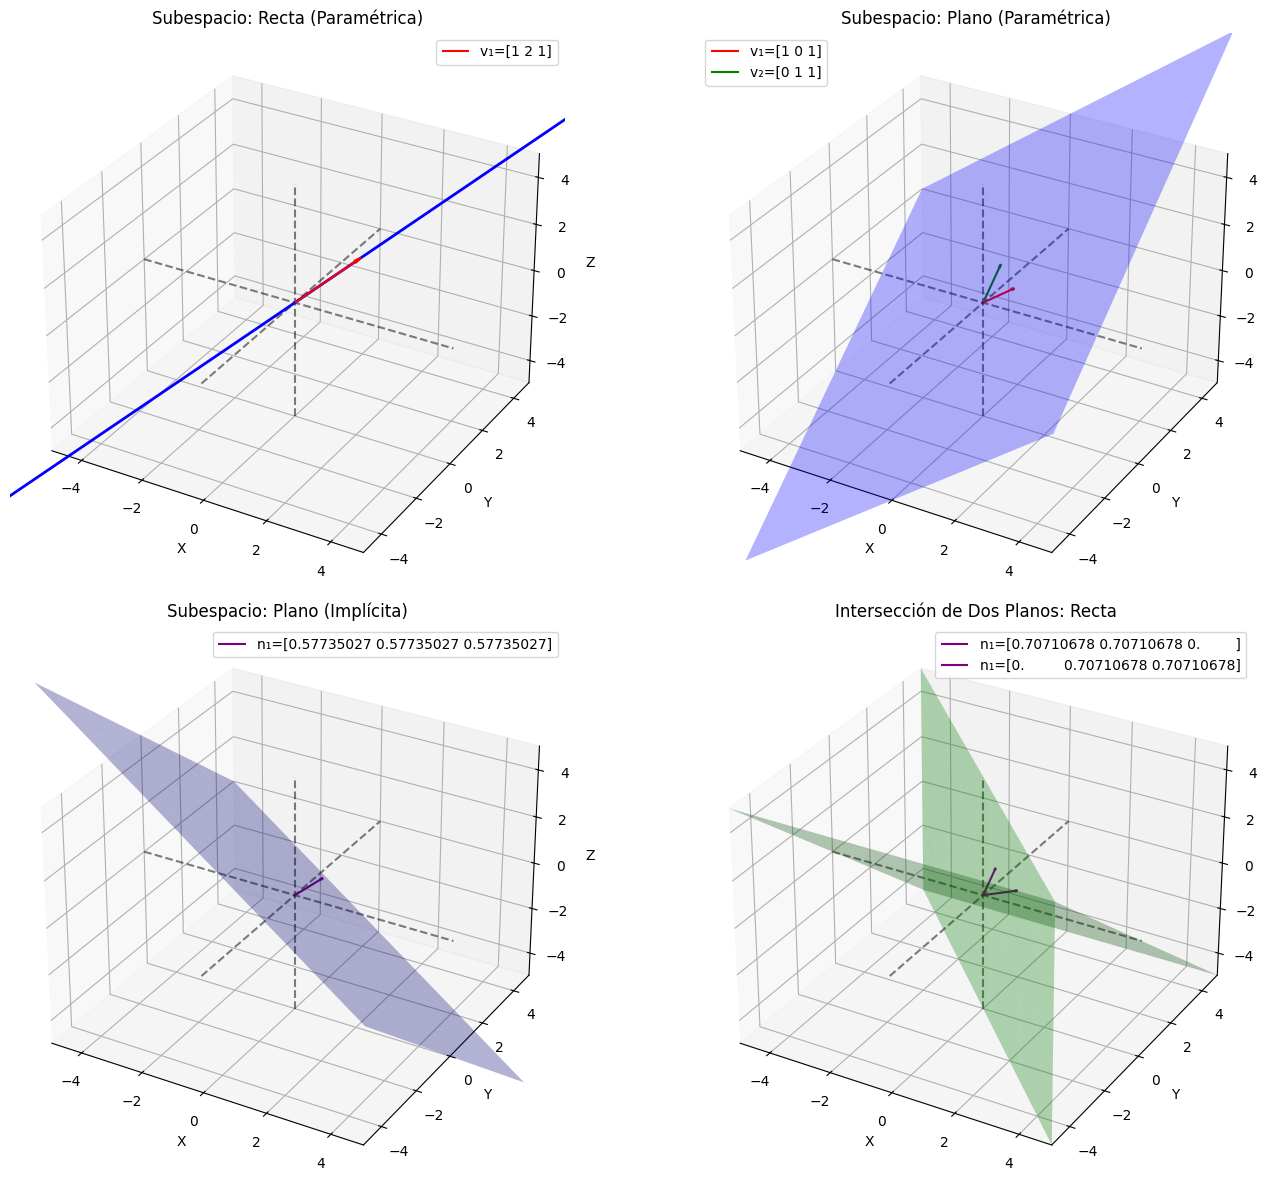

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_subspace(ax, vectors=None, normal_vectors=None, limits=5,
                 num_points=10, color='blue', alpha=0.3, title=None):
    """
    Dibuja un subespacio vectorial en R³

    Args:
        ax: Objeto de ejes 3D de matplotlib
        vectors: Lista de vectores generadores (para descripción paramétrica)
        normal_vectors: Lista de vectores normales (para descripción implícita)
        limits: Límites de los ejes
        num_points: Número de puntos para la malla
        color: Color del subespacio
        alpha: Transparencia
        title: Título para el gráfico
    """
    # Configurar límites
    ax.set_xlim([-limits, limits])
    ax.set_ylim([-limits, limits])
    ax.set_zlim([-limits, limits])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    if title:
        ax.set_title(title)

    # Dibujar los ejes
    ax.plot([-limits, limits], [0, 0], [0, 0], 'k--', alpha=0.5)
    ax.plot([0, 0], [-limits, limits], [0, 0], 'k--', alpha=0.5)
    ax.plot([0, 0], [0, 0], [-limits, limits], 'k--', alpha=0.5)

    if vectors is not None:
        # Descripción paramétrica
        dim = len(vectors)

        if dim == 1:
            # Caso de una recta
            v = vectors[0]
            t = np.linspace(-limits, limits, num_points)
            points = np.outer(t, v)
            ax.plot(points[:, 0], points[:, 1], points[:, 2], color=color, lw=2)
            # Dibujar el vector generador
            ax.quiver(0, 0, 0, v[0], v[1], v[2], color='r', arrow_length_ratio=0.1, label=f'v₁={v}')
            ax.legend()

        elif dim == 2:
            # Caso de un plano
            v1, v2 = vectors
            # Crear una malla de parámetros
            t1 = np.linspace(-limits, limits, num_points)
            t2 = np.linspace(-limits, limits, num_points)
            T1, T2 = np.meshgrid(t1, t2)

            # Generar puntos en el plano
            X = v1[0]*T1 + v2[0]*T2
            Y = v1[1]*T1 + v2[1]*T2
            Z = v1[2]*T1 + v2[2]*T2

            # Dibujar el plano
            ax.plot_surface(X, Y, Z, color=color, alpha=alpha)

            # Dibujar los vectores generadores
            ax.quiver(0, 0, 0, v1[0], v1[1], v1[2], color='r', arrow_length_ratio=0.1, label=f'v₁={v1}')
            ax.quiver(0, 0, 0, v2[0], v2[1], v2[2], color='g', arrow_length_ratio=0.1, label=f'v₂={v2}')
            ax.legend()

    if normal_vectors is not None:
        # Descripción implícita
        for i, n in enumerate(normal_vectors):
            # Normalizar el vector normal
            n = n / np.linalg.norm(n)

            # Generamos un plano perpendicular al vector normal
            if n[2] != 0:  # Si la componente z no es cero
                # Creamos una malla para x e y
                x = np.linspace(-limits, limits, num_points)
                y = np.linspace(-limits, limits, num_points)
                X, Y = np.meshgrid(x, y)
                # La ecuación del plano es n·(x,y,z) = 0, por lo que z = -(n_x·x + n_y·y) / n_z
                Z = -(n[0]*X + n[1]*Y) / n[2]
            elif n[1] != 0:  # Si la componente y no es cero
                x = np.linspace(-limits, limits, num_points)
                z = np.linspace(-limits, limits, num_points)
                X, Z = np.meshgrid(x, z)
                Y = -(n[0]*X + n[2]*Z) / n[1]
            else:  # Si la componente x no es cero
                y = np.linspace(-limits, limits, num_points)
                z = np.linspace(-limits, limits, num_points)
                Y, Z = np.meshgrid(y, z)
                X = -(n[1]*Y + n[2]*Z) / n[0]

            # Dibujar el plano
            ax.plot_surface(X, Y, Z, color=color, alpha=alpha)

            # Dibujar el vector normal
            ax.quiver(0, 0, 0, n[0], n[1], n[2], color='purple', arrow_length_ratio=0.1,
                      label=f'n₁={n}')
            ax.legend()

def parametric_to_implicit(vectors):
    """
    Convierte la descripción paramétrica de un subespacio a su forma implícita

    Args:
        vectors: Lista de vectores generadores

    Returns:
        Lista de vectores normales que definen las ecuaciones implícitas
    """
    # Formar la matriz con los vectores generadores como columnas
    A = np.column_stack(vectors)

    # El núcleo de A^T nos da los vectores normales
    # Usamos SVD para encontrar el espacio nulo
    U, S, Vh = np.linalg.svd(A.T)

    # El espacio nulo corresponde a las filas de Vh con valores singulares cero
    tol = 1e-10  # Tolerancia para valores cercanos a cero
    null_space = Vh[len(S):].T

    # Si no hay vectores en el espacio nulo (subespacio es todo R³)
    if null_space.size == 0:
        return []

    # Devolver los vectores normales
    return [null_space[:, i] for i in range(null_space.shape[1])]

def implicit_to_parametric(normal_vectors):
    """
    Convierte la descripción implícita de un subespacio a su forma paramétrica

    Args:
        normal_vectors: Lista de vectores normales

    Returns:
        Lista de vectores generadores
    """
    # Formar la matriz con los vectores normales como filas
    A = np.row_stack(normal_vectors)

    # El espacio nulo de A nos da los vectores generadores
    # Usamos SVD para encontrar el espacio nulo
    U, S, Vh = np.linalg.svd(A)

    # El espacio nulo corresponde a las filas de Vh con valores singulares cero
    tol = 1e-10  # Tolerancia para valores cercanos a cero
    null_space = Vh[len(S):].T

    # Si no hay vectores en el espacio nulo (subespacio es {0})
    if null_space.size == 0:
        return []

    # Devolver los vectores generadores
    return [null_space[:, i] for i in range(null_space.shape[1])]

def demonstrate_subspaces():
    # Crear la figura principal
    fig = plt.figure(figsize=(15, 12))

    # 1. Subespacio: Recta que pasa por el origen (dimensión 1)
    ax1 = fig.add_subplot(221, projection='3d')
    line_vector = np.array([1, 2, 1])
    plot_subspace(ax1, vectors=[line_vector], limits=5,
                 title='Subespacio: Recta (Paramétrica)')

    # Calcular la descripción implícita
    normal_vectors = parametric_to_implicit([line_vector])
    print("Recta: Descripción paramétrica - vector generador:")
    print(line_vector)
    print("\nRecta: Descripción implícita - vectores normales:")
    for n in normal_vectors:
        print(n)

    # 2. Subespacio: Plano que pasa por el origen (dimensión 2)
    ax2 = fig.add_subplot(222, projection='3d')
    plane_vectors = [np.array([1, 0, 1]), np.array([0, 1, 1])]
    plot_subspace(ax2, vectors=plane_vectors, limits=5,
                 title='Subespacio: Plano (Paramétrica)')

    # Calcular la descripción implícita
    normal_vector = parametric_to_implicit(plane_vectors)
    print("\nPlano: Descripción paramétrica - vectores generadores:")
    for v in plane_vectors:
        print(v)
    print("\nPlano: Descripción implícita - vector normal:")
    for n in normal_vector:
        print(n)

    # 3. Subespacio: Plano (descripción implícita)
    ax3 = fig.add_subplot(223, projection='3d')
    normal = np.array([1, 1, 1])
    plot_subspace(ax3, normal_vectors=[normal], limits=5,
                 title='Subespacio: Plano (Implícita)')

    # Calcular la descripción paramétrica
    generating_vectors = implicit_to_parametric([normal])
    print("\nPlano (impl): Descripción implícita - vector normal:")
    print(normal)
    print("\nPlano (impl): Descripción paramétrica - vectores generadores:")
    for v in generating_vectors:
        print(v)

    # 4. Intersección de dos planos: una recta
    ax4 = fig.add_subplot(224, projection='3d')
    normal1 = np.array([1, 1, 0])
    normal2 = np.array([0, 1, 1])
    plot_subspace(ax4, normal_vectors=[normal1, normal2], limits=5,
                 color='green', title='Intersección de Dos Planos: Recta')

    # Calcular la descripción paramétrica
    generating_vector = implicit_to_parametric([normal1, normal2])
    print("\nIntersección: Descripción implícita - vectores normales:")
    print(normal1)
    print(normal2)
    print("\nIntersección: Descripción paramétrica - vector generador:")
    for v in generating_vector:
        print(v)

    plt.tight_layout()
    plt.show()

# Ejecutar la demostración
demonstrate_subspaces()

#Intersección y Suma de Subespacios
##Intersección de subespacios
La intersección de dos subespacios $U$ y $W$ de un espacio vectorial $V$ es el conjunto:

$$
U \cap W = \{ v \in V : v \in U \text{ y } v \in W \}
$$

###Propiedades importantes:

- $U \cap W$ es también un subespacio de $V$
- $\dim(U \cap W) \leq \min(\dim(U), \dim(W))$

#Suma de subespacios
La suma de dos subespacios $U$ y $W$ de un espacio vectorial $V$ es el conjunto:
$$U+W={u+w:u∈U,w∈W}U + W = \{u + w : u \in U, w \in W\}U+W={u+w:u∈U,w∈W}$$
##Propiedades importantes:

- $U + W$ es también un subespacio de $V$

- $U + W$ es el menor subespacio que contiene tanto a $U$ como a $W$

- $\dim(U + W) = \dim(U) + \dim(W) - \dim(U \cap W)$

##Suma directa
Decimos que la suma $U + W$ es una suma directa, denotada $U \oplus W$, si para cada vector $v \in U + W$, existe una única forma de expresarlo como

 $v = u + w$ con $u \in U$ y $w \in W$.


La suma es directa si y solo si $U \cap W = {\vec{0}}$, y en ese caso:

$\dim(U \oplus W) = \dim(U) + \dim(W)$

Subespacio U (plano):
  [1 0 1]
  [0 1 1]
Dimensión de U: 2

Subespacio W (plano):
  [1 1 0]
  [0 0 1]
Dimensión de W: 2

Intersección U ∩ W:
  [-0.40824829 -0.40824829 -0.81649658]
Dimensión de U ∩ W: 1

Suma U + W:
  [-0.40824829 -0.40824829 -0.81649658]
  [ 7.07106781e-01 -7.07106781e-01  1.11022302e-16]
  [-0.57735027 -0.57735027  0.57735027]
Dimensión de U + W: 3

¿La suma es directa? No
La fórmula de las dimensiones se cumple:
dim(U) + dim(W) - dim(U ∩ W) = 2 + 2 - 1 = 3
dim(U + W) = 3


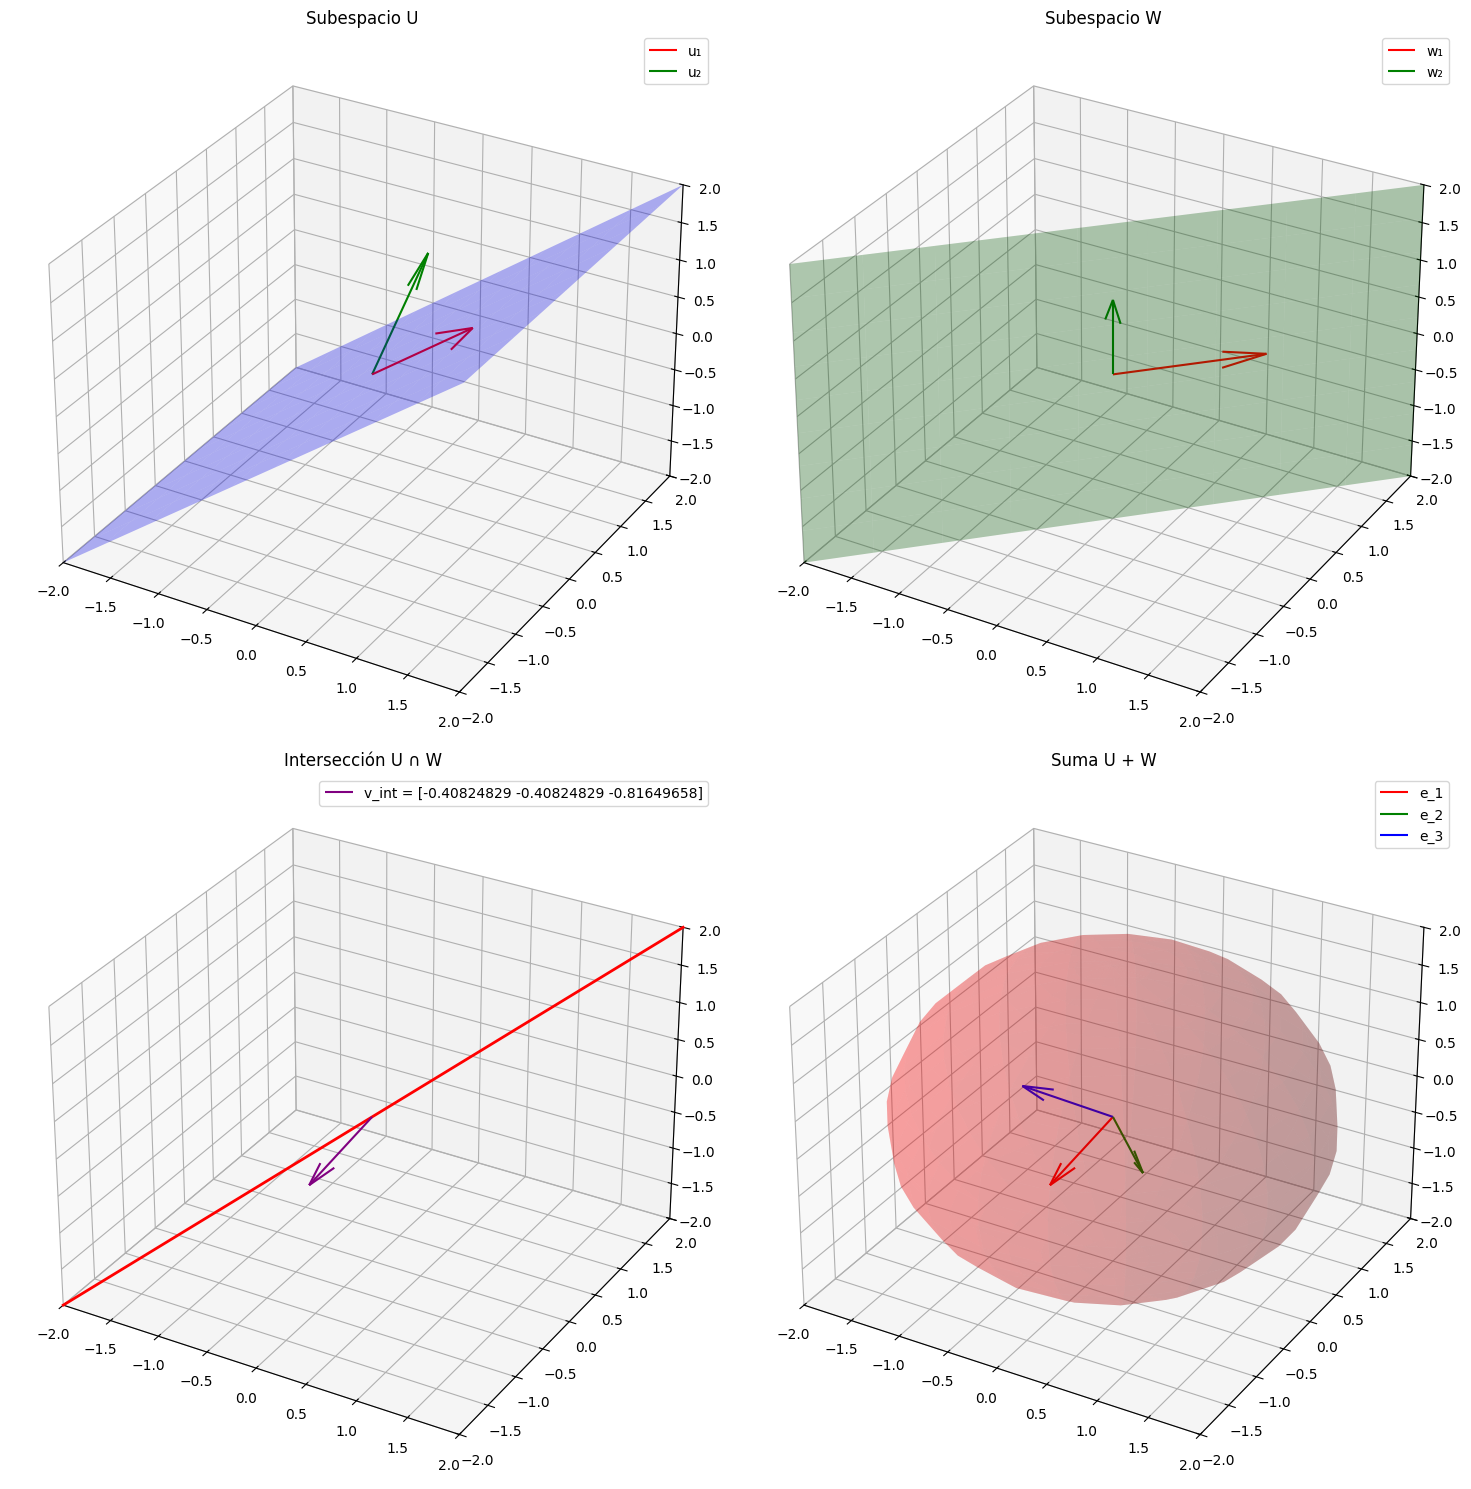


----- Ejemplo de Suma Directa -----
Subespacio U (plano xy):
  [1 0 0]
  [0 1 0]
Dimensión de U: 2

Subespacio W (eje z):
  [0 0 1]
Dimensión de W: 1

Intersección U ∩ W:
Dimensión de U ∩ W: 0

Suma U + W:
  [1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 1.]
Dimensión de U + W: 3

¿La suma es directa? Sí
La fórmula de las dimensiones para suma directa se cumple:
dim(U) + dim(W) = 2 + 1 = 3
dim(U ⊕ W) = 3


In [6]:
import numpy as np
from scipy.linalg import null_space
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def span(vectors):
    """
    Calcula el subespacio generado por un conjunto de vectores.

    Args:
        vectors: Lista de vectores

    Returns:
        Una matriz cuyas columnas forman una base del subespacio
    """
    # Formar la matriz con los vectores como columnas
    A = np.column_stack(vectors)

    # Realizar SVD para encontrar una base
    U, S, Vh = np.linalg.svd(A, full_matrices=False)

    # Determinar el rango
    tol = 1e-10
    r = np.sum(S > tol)

    # Devolver las columnas de U correspondientes a valores singulares no nulos
    return U[:, :r]

def intersection(basis1, basis2):
    """
    Calcula una base para la intersección de dos subespacios.

    Args:
        basis1: Matriz cuyas columnas forman una base del primer subespacio
        basis2: Matriz cuyas columnas forman una base del segundo subespacio

    Returns:
        Una matriz cuyas columnas forman una base de la intersección
    """
    # Encontrar vectores v que satisfacen A*v = B*w para algún w
    # Esto es equivalente a encontrar v en el espacio nulo de [A -B]
    A = basis1
    B = basis2

    # Formar la matriz aumentada [A -B]
    AB = np.column_stack([A, -B])

    # Encontrar el espacio nulo de AB
    ns = null_space(AB)

    if ns.size == 0:
        return np.zeros((A.shape[0], 0))  # Intersección vacía

    # Recuperar las componentes correspondientes a A
    v_components = ns[:A.shape[1], :]

    # Proyectar estos vectores en el subespacio original
    intersection_basis = A @ v_components

    # Ortonormalizar la base resultante
    Q, R = np.linalg.qr(intersection_basis)

    # Determinar el rango para mantener solo vectores linealmente independientes
    tol = 1e-10
    r = min(R.shape)
    for i in range(min(R.shape)):
        if abs(R[i, i]) < tol:
            r = i
            break

    return Q[:, :r]

def sum_subspaces(basis1, basis2):
    """
    Calcula una base para la suma de dos subespacios.

    Args:
        basis1: Matriz cuyas columnas forman una base del primer subespacio
        basis2: Matriz cuyas columnas forman una base del segundo subespacio

    Returns:
        Una matriz cuyas columnas forman una base de la suma
    """
    # La suma es el espacio generado por la unión de las bases
    combined = np.column_stack([basis1, basis2])

    # Ortonormalizar para obtener una base
    Q, R = np.linalg.qr(combined)

    # Determinar el rango para mantener solo vectores linealmente independientes
    tol = 1e-10
    r = min(R.shape)
    for i in range(min(R.shape)):
        if abs(R[i, i]) < tol:
            r = i
            break

    return Q[:, :r]

def is_direct_sum(basis1, basis2):
    """
    Verifica si la suma de dos subespacios es directa.

    Args:
        basis1: Matriz cuyas columnas forman una base del primer subespacio
        basis2: Matriz cuyas columnas forman una base del segundo subespacio

    Returns:
        True si la suma es directa (intersección = {0}), False en caso contrario
    """
    # Calcular la intersección
    intersection_basis = intersection(basis1, basis2)

    # La suma es directa si la intersección es solo el vector nulo
    return intersection_basis.shape[1] == 0

def demonstrate_intersection_and_sum():
    """
    Demuestra la intersección y suma de subespacios en R³.
    """
    # Definir dos subespacios mediante vectores generadores
    # Subespacio 1: un plano
    u1 = np.array([1, 0, 1])
    u2 = np.array([0, 1, 1])
    U_vectors = [u1, u2]
    U_basis = span(U_vectors)

    # Subespacio 2: otro plano
    w1 = np.array([1, 1, 0])
    w2 = np.array([0, 0, 1])
    W_vectors = [w1, w2]
    W_basis = span(W_vectors)

    # Calcular la intersección
    intersection_basis = intersection(U_basis, W_basis)

    # Calcular la suma
    sum_basis = sum_subspaces(U_basis, W_basis)

    # Verificar si es suma directa
    is_direct = is_direct_sum(U_basis, W_basis)

    # Imprimir resultados
    print("Subespacio U (plano):")
    for v in U_vectors:
        print(f"  {v}")
    print(f"Dimensión de U: {U_basis.shape[1]}")

    print("\nSubespacio W (plano):")
    for v in W_vectors:
        print(f"  {v}")
    print(f"Dimensión de W: {W_basis.shape[1]}")

    print("\nIntersección U ∩ W:")
    for i in range(intersection_basis.shape[1]):
        print(f"  {intersection_basis[:, i]}")
    print(f"Dimensión de U ∩ W: {intersection_basis.shape[1]}")

    print("\nSuma U + W:")
    for i in range(sum_basis.shape[1]):
        print(f"  {sum_basis[:, i]}")
    print(f"Dimensión de U + W: {sum_basis.shape[1]}")

    print(f"\n¿La suma es directa? {'Sí' if is_direct else 'No'}")

    if not is_direct:
        print("La fórmula de las dimensiones se cumple:")
        print(f"dim(U) + dim(W) - dim(U ∩ W) = {U_basis.shape[1]} + {W_basis.shape[1]} - {intersection_basis.shape[1]} = {U_basis.shape[1] + W_basis.shape[1] - intersection_basis.shape[1]}")
        print(f"dim(U + W) = {sum_basis.shape[1]}")

    # Visualizar los subespacios
    fig = plt.figure(figsize=(15, 15))

    # Preparar límites y malla
    limits = 2
    x = np.linspace(-limits, limits, 10)
    y = np.linspace(-limits, limits, 10)
    X, Y = np.meshgrid(x, y)

    # 1. Visualizar primer subespacio (U)
    ax1 = fig.add_subplot(221, projection='3d')
    # Ecuación paramétrica del plano U: (x,y,z) = a*(1,0,1) + b*(0,1,1)
    # Implícitamente: x - z = 0 y y - z = 0 => x = z, y = z
    Z_U = X  # x = z
    ax1.plot_surface(X, Y, Z_U, color='blue', alpha=0.3)
    ax1.quiver(0, 0, 0, u1[0], u1[1], u1[2], color='r', label='u₁')
    ax1.quiver(0, 0, 0, u2[0], u2[1], u2[2], color='g', label='u₂')
    ax1.set_xlim([-limits, limits])
    ax1.set_ylim([-limits, limits])
    ax1.set_zlim([-limits, limits])
    ax1.set_title('Subespacio U')
    ax1.legend()

    # 2. Visualizar segundo subespacio (W)
    ax2 = fig.add_subplot(222, projection='3d')
    # Ecuación paramétrica del plano W: (x,y,z) = a*(1,1,0) + b*(0,0,1)
    # Implícitamente: x = y => y - x = 0
    Z_W = np.zeros_like(X)  # Inicializar con ceros
    for i in range(Z_W.shape[0]):
        for j in range(Z_W.shape[1]):
            Z_W[i,j] = np.linspace(-limits, limits, 10)[i]  # z varía independientemente
    ax2.plot_surface(X, X, Z_W, color='green', alpha=0.3)  # Note que Y=X para y=x
    ax2.quiver(0, 0, 0, w1[0], w1[1], w1[2], color='r', label='w₁')
    ax2.quiver(0, 0, 0, w2[0], w2[1], w2[2], color='g', label='w₂')
    ax2.set_xlim([-limits, limits])
    ax2.set_ylim([-limits, limits])
    ax2.set_zlim([-limits, limits])
    ax2.set_title('Subespacio W')
    ax2.legend()

    # 3. Visualizar la intersección
    ax3 = fig.add_subplot(223, projection='3d')
    # La intersección es una recta donde x = y = z
    t = np.linspace(-limits, limits, 100)
    ax3.plot(t, t, t, 'r-', linewidth=2)
    if intersection_basis.shape[1] > 0:
        v_int = intersection_basis[:, 0]
        ax3.quiver(0, 0, 0, v_int[0], v_int[1], v_int[2], color='purple',
                  label=f'v_int = {v_int}')
    ax3.set_xlim([-limits, limits])
    ax3.set_ylim([-limits, limits])
    ax3.set_zlim([-limits, limits])
    ax3.set_title('Intersección U ∩ W')
    ax3.legend()

    # 4. Visualizar la suma (en este caso, todo R³)
    ax4 = fig.add_subplot(224, projection='3d')
    # Si la suma es todo R³, podemos mostrar una esfera o una caja
    if sum_basis.shape[1] == 3:  # R³ completo
        # Crear una esfera
        u = np.linspace(0, 2 * np.pi, 20)
        v = np.linspace(0, np.pi, 20)
        x = limits * np.outer(np.cos(u), np.sin(v))
        y = limits * np.outer(np.sin(u), np.sin(v))
        z = limits * np.outer(np.ones(np.size(u)), np.cos(v))
        ax4.plot_surface(x, y, z, color='red', alpha=0.2)

        # Mostrar los vectores de la base
        for i in range(sum_basis.shape[1]):
            v_sum = sum_basis[:, i]
            ax4.quiver(0, 0, 0, v_sum[0], v_sum[1], v_sum[2],
                      color=['r', 'g', 'b'][i], label=f'e_{i+1}')
    else:
        # Si no es todo R³, mostramos los vectores de la base
        for i in range(sum_basis.shape[1]):
            v_sum = sum_basis[:, i]
            ax4.quiver(0, 0, 0, v_sum[0], v_sum[1], v_sum[2],
                      color=['r', 'g', 'b'][i], label=f'v_sum_{i+1}')

    ax4.set_xlim([-limits, limits])
    ax4.set_ylim([-limits, limits])
    ax4.set_zlim([-limits, limits])
    ax4.set_title('Suma U + W')
    ax4.legend()

    plt.tight_layout()
    plt.show()

    # Ejemplo adicional: Suma directa
    print("\n----- Ejemplo de Suma Directa -----")

    # Subespacio 1: un plano xy (z=0)
    u1_direct = np.array([1, 0, 0])
    u2_direct = np.array([0, 1, 0])
    U_direct_vectors = [u1_direct, u2_direct]
    U_direct_basis = span(U_direct_vectors)

    # Subespacio 2: el eje z
    w1_direct = np.array([0, 0, 1])
    W_direct_vectors = [w1_direct]
    W_direct_basis = span(W_direct_vectors)

    # Calcular la intersección
    intersection_direct = intersection(U_direct_basis, W_direct_basis)

    # Calcular la suma
    sum_direct = sum_subspaces(U_direct_basis, W_direct_basis)

    # Verificar si es suma directa
    is_direct_sum_result = is_direct_sum(U_direct_basis, W_direct_basis)

    # Imprimir resultados
    print("Subespacio U (plano xy):")
    for v in U_direct_vectors:
        print(f"  {v}")
    print(f"Dimensión de U: {U_direct_basis.shape[1]}")

    print("\nSubespacio W (eje z):")
    for v in W_direct_vectors:
        print(f"  {v}")
    print(f"Dimensión de W: {W_direct_basis.shape[1]}")

    print("\nIntersección U ∩ W:")
    for i in range(intersection_direct.shape[1]):
        print(f"  {intersection_direct[:, i]}")
    print(f"Dimensión de U ∩ W: {intersection_direct.shape[1]}")

    print("\nSuma U + W:")
    for i in range(sum_direct.shape[1]):
        print(f"  {sum_direct[:, i]}")
    print(f"Dimensión de U + W: {sum_direct.shape[1]}")

    print(f"\n¿La suma es directa? {'Sí' if is_direct_sum_result else 'No'}")

    if is_direct_sum_result:
        print("La fórmula de las dimensiones para suma directa se cumple:")
        print(f"dim(U) + dim(W) = {U_direct_basis.shape[1]} + {W_direct_basis.shape[1]} = {U_direct_basis.shape[1] + W_direct_basis.shape[1]}")
        print(f"dim(U ⊕ W) = {sum_direct.shape[1]}")

# Ejecutar la demostración
demonstrate_intersection_and_sum()

#Espacio Cociente Módulo de un Subespacio Vectorial
##Definición y Motivación
El espacio cociente es una construcción algebraica fundamental que nos permite "comprimir" un espacio vectorial, identificando vectores que difieren en un elemento de un subespacio dado.

Sea $V$ un espacio vectorial y $W$ un subespacio de $V$. Definimos una relación de equivalencia $\sim$ en $V$ de la siguiente manera:

$$
\vec{u} \sim \vec{v} \iff \vec{u} - \vec{v} \in W
$$

En otras palabras, dos vectores son equivalentes si su diferencia pertenece al subespacio $ W $.


El espacio cociente $V/W$ (leído "V módulo W") es el conjunto de todas las clases de equivalencia:

$$
V / W = \{ [\vec{v}] : \vec{v} \in V \}
$$

donde

$$
[\vec{v}] = \{ \vec{u} \in V : \vec{u} \sim \vec{v} \} = \{ \vec{v} + \vec{w} : \vec{w} \in W \}
$$
##Estructura de Espacio Vectorial
El espacio cociente $V/W$ hereda una estructura de espacio vectorial con las siguientes operaciones:

Suma: $[\vec{u}] + [\vec{v}] = [\vec{u} + \vec{v}]$
Multiplicación por escalar: $\alpha[\vec{v}] = [\alpha\vec{v}]$

##Propiedades Importantes

**Dimensión**: $\dim(V/W) = \dim(V) - \dim(W)$

**Proyección canónica**: Existe una transformación lineal $\pi: V \rightarrow V/W$ definida por $\pi(\vec{v}) = [\vec{v}]$

*Núcleo de la proyección**: $\ker(\pi) = W$

Isomorfismo con complemento: Si $V = W \oplus U$, entonces $V/W \cong U$

##Interpretación Geométrica
Geométricamente, el espacio cociente $V/W$ corresponde a "aplastar" el subespacio $W$ a un punto (el vector cero del espacio cociente) y considerar las direcciones "perpendiculares" a $W$.

Cada clase de equivalencia $[\vec{v}]$ corresponde a un "desplazamiento" del subespacio $W$ en la dirección de $\vec{v}$.
Todos los vectores que se encuentran en el mismo "desplazamiento" del subespacio $W$ son considerados equivalentes.

###Ejemplos:

Recta módulo un punto: Si $V = \mathbb{R}$ y $W = {0}$, entonces $V/W \cong \mathbb{R}$

Plano módulo una recta: Si $V = \mathbb{R}^2$ y $W$ es una recta que pasa por el origen, entonces $V/W \cong \mathbb{R}$

Espacio 3D módulo un plano: Si $V = \mathbb{R}^3$ y $W$ es un plano que pasa por el origen, entonces $V/W \cong \mathbb{R}$

#Aplicaciones
Los espacios cociente tienen numerosas aplicaciones en matemáticas y física:

**Álgebra Lineal**: Simplificación de sistemas de ecuaciones lineales

Teoría de Grupos: Cocientes de grupos y teoremas de isomorfismo

Geometría Diferencial: Espacios tangentes y cotangentes

Física Teórica: Espacios de configuración en teorías de gauge

###Ejemplo Concreto: $\mathbb{R}^3$ módulo una recta
Consideremos $V = \mathbb{R}^3$ y $W$ como la recta generada por el vector $\vec{w} = (1, 1, 1)$.

Las clases de equivalencia en $V/W$ son de la forma:

$$
[\vec{v}] = \{ \vec{v} + t\vec{w} : t \in \mathbb{R} \}
$$

Estas clases forman un subespacio de dimensión 2 (un plano) en $\mathbb{R}^3$. Cada clase corresponde a una recta paralela a $\vec{w}$.
El espacio cociente $V/W$ es isomorfo a cualquier plano complementario a la recta $W$, por ejemplo, el plano $P = {(x, y, z) \in \mathbb{R}^3 : x + y + z = 0}$.

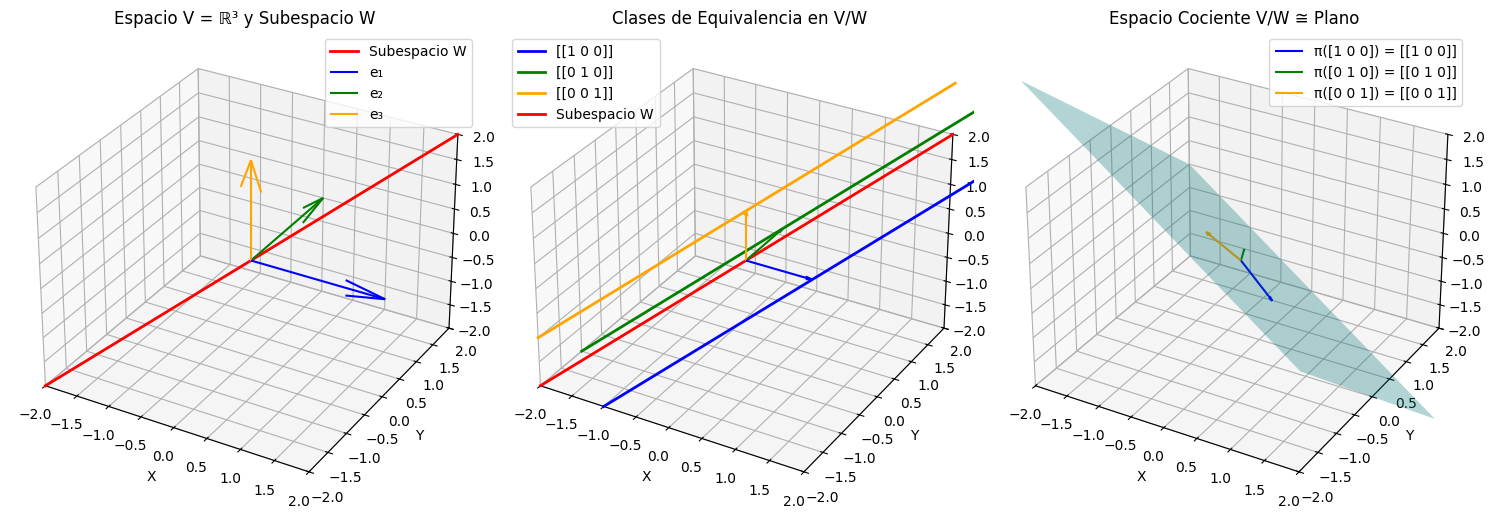

Dimensión de V: 3
Dimensión de W: 1
Dimensión de V/W: 2
Esto coincide con la dimensión del plano mostrado.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_quotient_space_example():
    """
    Visualiza un ejemplo de espacio cociente: R³ módulo una recta
    """
    # Crear la figura
    fig = plt.figure(figsize=(15, 5))

    # 1. Visualizar el espacio original y el subespacio
    ax1 = fig.add_subplot(131, projection='3d')

    # Subespacio W: recta generada por (1,1,1)
    w = np.array([1, 1, 1])
    t = np.linspace(-2, 2, 100)
    line_points = np.outer(t, w)

    # Dibujar la recta
    ax1.plot(line_points[:, 0], line_points[:, 1], line_points[:, 2],
             'r-', linewidth=2, label='Subespacio W')

    # Dibujar algunos vectores del espacio
    ax1.quiver(0, 0, 0, 1, 0, 0, color='blue', label='e₁', length=2)
    ax1.quiver(0, 0, 0, 0, 1, 0, color='green', label='e₂', length=2)
    ax1.quiver(0, 0, 0, 0, 0, 1, color='orange', label='e₃', length=2)

    # Configurar límites y etiquetas
    ax1.set_xlim([-2, 2])
    ax1.set_ylim([-2, 2])
    ax1.set_zlim([-2, 2])
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('Espacio V = ℝ³ y Subespacio W')
    ax1.legend()

    # 2. Visualizar algunas clases de equivalencia
    ax2 = fig.add_subplot(132, projection='3d')

    # Vectores representantes de clases de equivalencia
    representatives = [
        np.array([1, 0, 0]),
        np.array([0, 1, 0]),
        np.array([0, 0, 1])
    ]

    colors = ['blue', 'green', 'orange']

    # Dibujar cada clase de equivalencia como una recta
    for i, v in enumerate(representatives):
        # Generar puntos en la clase [v]
        t = np.linspace(-2, 2, 100)
        equiv_class = np.array([v + t_i*w for t_i in t])

        # Dibujar la clase de equivalencia
        ax2.plot(equiv_class[:, 0], equiv_class[:, 1], equiv_class[:, 2],
                 color=colors[i], linewidth=2, label=f'[{v}]')

        # Dibujar el vector representante
        ax2.quiver(0, 0, 0, v[0], v[1], v[2], color=colors[i],
                   arrow_length_ratio=0.1)

    # Dibujar el subespacio W
    ax2.plot(line_points[:, 0], line_points[:, 1], line_points[:, 2],
             'r-', linewidth=2, label='Subespacio W')

    # Configurar límites y etiquetas
    ax2.set_xlim([-2, 2])
    ax2.set_ylim([-2, 2])
    ax2.set_zlim([-2, 2])
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.set_title('Clases de Equivalencia en V/W')
    ax2.legend()

    # 3. Visualizar el espacio cociente como un plano
    ax3 = fig.add_subplot(133, projection='3d')

    # Generar un plano perpendicular a w (x + y + z = 0)
    xx, yy = np.meshgrid(np.linspace(-2, 2, 10), np.linspace(-2, 2, 10))
    zz = -(xx + yy)  # x + y + z = 0

    # Dibujar el plano
    ax3.plot_surface(xx, yy, zz, alpha=0.3, color='cyan')

    # Proyectar los vectores representantes al plano
    for i, v in enumerate(representatives):
        # Proyectar ortogonalmente v al plano
        # Fórmula: v_proj = v - (v·n)/(n·n) * n, donde n es la normal al plano
        n = np.array([1, 1, 1])  # normal al plano x + y + z = 0
        proj = v - np.dot(v, n)/np.dot(n, n) * n

        # Dibujar el vector proyectado
        ax3.quiver(0, 0, 0, proj[0], proj[1], proj[2], color=colors[i],
                  arrow_length_ratio=0.1, label=f'π({v}) = [{v}]')

    # Configurar límites y etiquetas
    ax3.set_xlim([-2, 2])
    ax3.set_ylim([-2, 2])
    ax3.set_zlim([-2, 2])
    ax3.set_xlabel('X')
    ax3.set_ylabel('Y')
    ax3.set_zlabel('Z')
    ax3.set_title('Espacio Cociente V/W ≅ Plano')
    ax3.legend()

    plt.tight_layout()
    plt.show()

    # Calcular y mostrar la dimensión del espacio cociente
    dim_V = 3
    dim_W = 1
    dim_quotient = dim_V - dim_W
    print(f"Dimensión de V: {dim_V}")
    print(f"Dimensión de W: {dim_W}")
    print(f"Dimensión de V/W: {dim_quotient}")
    print("Esto coincide con la dimensión del plano mostrado.")

# Ejecutar la demostración
plot_quotient_space_example()